In [5]:
import time
import numpy as np
import nmrglue as ng
import MRAi_2D as ma
import Proc_2D as pr
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':25})

In [6]:
%%time
spectrum = "Ubi.ft2"
Dic , Ref = ng.pipe.read("Spectra/"+spectrum)

DNN_dirc = "Trained_NN/NUS/"

#The size of protein: Small, Medium, Large
Protien_size = "Small"

#The reconstraction scheme: WNN-F, WNN-P, WNN-R
Method = "WNN-F"

#In the case of WNN-F, used table is: S_0, S_1, ..., S_10
NN_F = "S_9"

DNN_dirc += Protien_size + '/' + Method +'/'
if Method == "WNN-F":
    DNN_dirc += NN_F + '/'

nuslist_dirc = DNN_dirc + 'ind_NUS.txt'
ind_NUS = []
with open(nuslist_dirc) as f:
    for line in f:
        ind_NUS.append(int(line))
        
NUS = pr.convertors.US_to_NUS(Ref,ind_NUS)
dic , nus = pr.pipe_generator.iFT_ID(Dic,NUS)


CPU times: user 253 ms, sys: 16.1 ms, total: 269 ms
Wall time: 270 ms


In [7]:
%%time
VE = ma.convertors.US_VE(nus,128)
pred = ma.Production.NUS_Rec(VE,ind_NUS,len(ind_NUS)/128,DNN_dirc)
ft1 = np.zeros_like(nus)
ft1[:min(int(pred.shape[0]),int(ft1.shape[0]))] = pred[:min(int(pred.shape[0]),int(ft1.shape[0]))]
_, WNN = pr.pipe_generator.FT_ID(dic,ft1)
CS = pr.CS.NUS_US(NUS,ind_NUS,200)


64/64 [==============================] - 0s 1ms/step
CPU times: user 7min 12s, sys: 19.4 s, total: 7min 32s
Wall time: 20.2 s


CPU times: user 17 s, sys: 645 ms, total: 17.7 s
Wall time: 1.32 s
Parser   : 101 ms


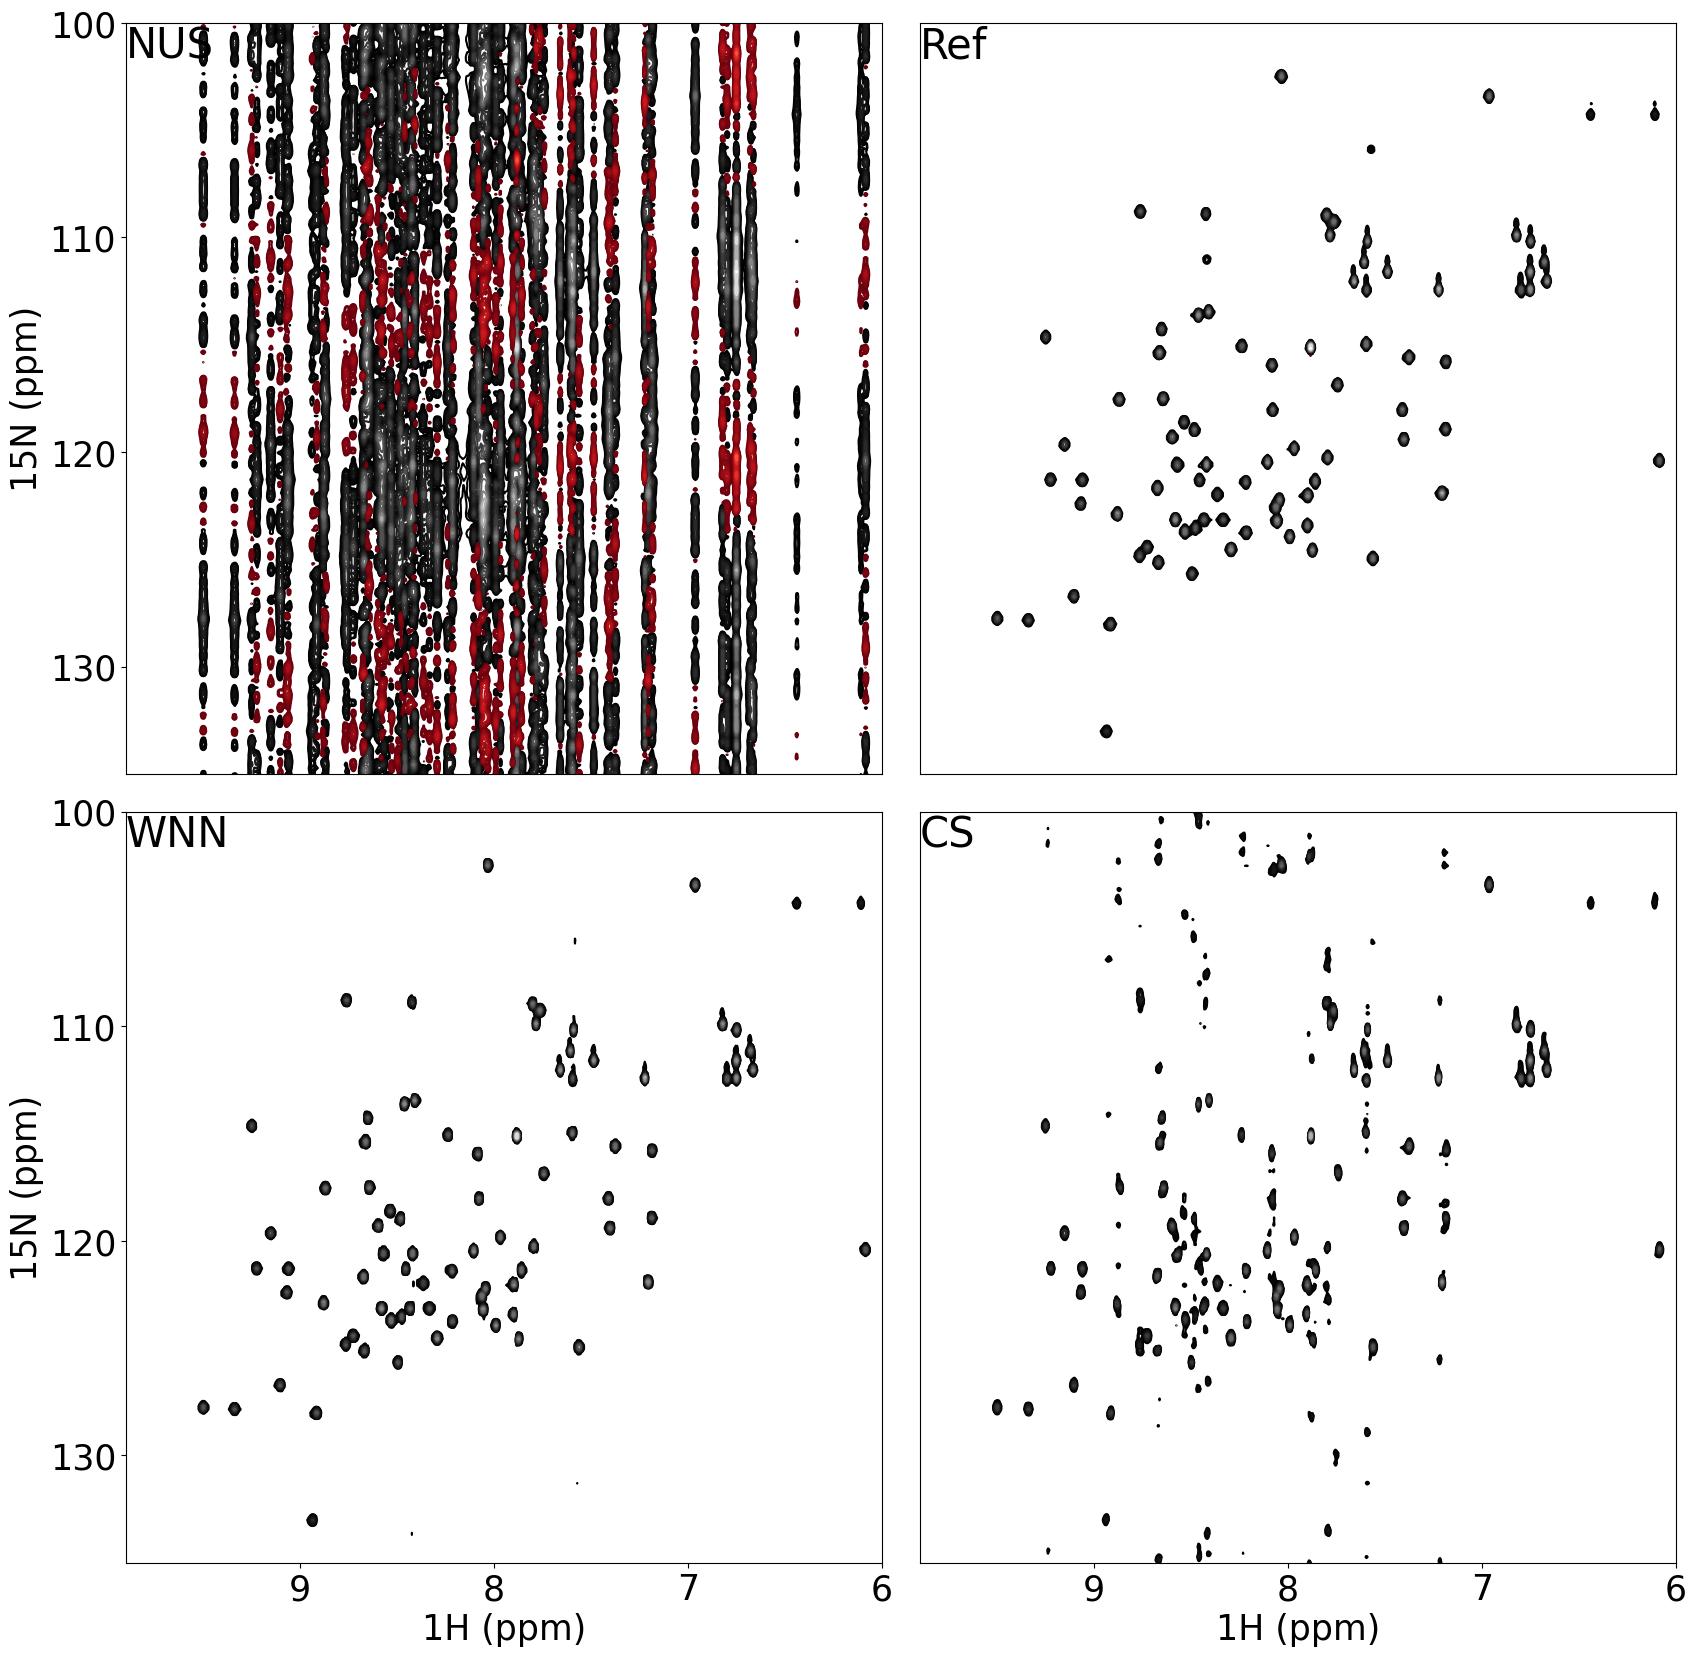

In [8]:
%%time
fig, ax = plt.subplots(2,2,figsize=(2*10,2*10))
cmap = [plt.cm.Greys_r,plt.cm.Reds_r]    #[+,-] contour map (colors to use for contours)
contour = [0.025,1.3,15]         #[contour level start value, scaling factor between contour level]
lim = [9.9,6,135,100]                 #[xlim from,xlim to,ylim from,ylim to]

pr.PLOTS.subp(ax[0,0],Dic,NUS/np.max(NUS), "NUS",contour,cmap,lim)
pr.PLOTS.subp(ax[0,1],Dic,Ref/np.max(Ref), "Ref",contour,cmap,lim)
pr.PLOTS.subp(ax[1,0],Dic,WNN/np.max(Ref), "WNN",contour,cmap,lim)
pr.PLOTS.subp(ax[1,1],Dic,CS/np.max(Ref), "CS",contour,cmap,lim)

ax[0,0].axes.xaxis.set_visible(False)
ax[0,1].axes.xaxis.set_visible(False)
ax[0,1].axes.yaxis.set_visible(False)
ax[1,1].axes.yaxis.set_visible(False)

plt.subplots_adjust(wspace=0.05, hspace=0.05)